In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
from os import listdir, chdir
from os.path import isfile, join

data_loc = "/home/olga/Projects/CPI/dataset"
datasets = [f for f in listdir(data_loc) if isfile(join(data_loc, f))]

In [3]:
cpi_csv = list(filter(lambda dataset: True if 'cpi' in dataset else False,
                 datasets))[0]

chdir(data_loc)

df = pd.read_csv(cpi_csv)
df = df.dropna()

for f in datasets:
    if f == cpi_csv:
        continue 
    df1 = pd.read_csv(f)
    df = pd.merge(df, df1)
    
del df1

In [8]:
idx_start = f"{df.iloc[0,2]}-{df.iloc[0,3]}-1"
idx_end = f"{df.iloc[df.shape[0]-1,2]}-{df.iloc[df.shape[0]-1,3]}-1"
dates = pd.date_range(idx_start, idx_end, freq='M')
#df['Date'] = dates

In [9]:
df.columns

Index(['Country', 'Code', 'Year', 'Month', 'Consumer Price Index (CPI)',
       'Inflation monthly percent change in the CPI',
       'Inflation annual percent change in the CPI',
       'Employment million people', 'Unemployment rate percent',
       'Labor cost index', 'Minimum wage', 'Economic (GDP) growth percent',
       'Industrial production annual percent change', 'Retail sales Y-on-Y',
       'House price index', 'Building permits',
       'Real residential property prices Y-on-Y percent change',
       'Business confidence survey',
       'Current account balance million currency units',
       'Exports million currency units',
       'Foreign exchange reserves billion currency units',
       'Foreign direct investment million currency units',
       'Government expenditure billion currency units',
       'Budget balance million currency units', 'Sovereign credit ratings',
       'Government bond 10-year yield percent', 'Government debt',
       'Household consumption billion

In [10]:
percent_missing = df.isna().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
Government debt,Government debt,100.000000
Labor cost index,Labor cost index,100.000000
Debt service ratios for private non-financial sector,Debt service ratios for private non-financial ...,100.000000
Credit gap,Credit gap,100.000000
Real residential property prices Y-on-Y percent change,Real residential property prices Y-on-Y percen...,100.000000
Government bond 10-year yield percent,Government bond 10-year yield percent,100.000000
House price index,House price index,100.000000
Sovereign credit ratings,Sovereign credit ratings,100.000000
Building permits,Building permits,95.774648
Business confidence survey,Business confidence survey,84.507042


In [11]:
columns_to_remove = [
    row[1]['column_name'] for row in missing_value_df.iterrows()
    if row[1]['percent_missing'] >= 0.75
]
#df = df.drop(columns=columns_to_remove)
sorted(df.columns)

['Bank deposit interest rate percent',
 'Budget balance million currency units',
 'Building permits',
 'Business confidence survey',
 'Business credit billion currency units',
 'Business credit interest rate percent',
 'Code',
 'Consumer Price Index (CPI)',
 'Consumer credit billion currency units',
 'Consumption as percent of GDP',
 'Consumption growth',
 'Country',
 'Credit gap',
 'Current account balance million currency units',
 'Debt service ratios for private non-financial sector',
 'Economic (GDP) growth percent',
 'Employment million people',
 'Exchange rate USD',
 'Exports million currency units',
 'Foreign direct investment million currency units',
 'Foreign exchange reserves billion currency units',
 'Government bond 10-year yield percent',
 'Government debt',
 'Government expenditure billion currency units',
 'House price index',
 'Household consumption billion currency units',
 'Household credit billion currency units',
 'Industrial production annual percent change',
 'Inf

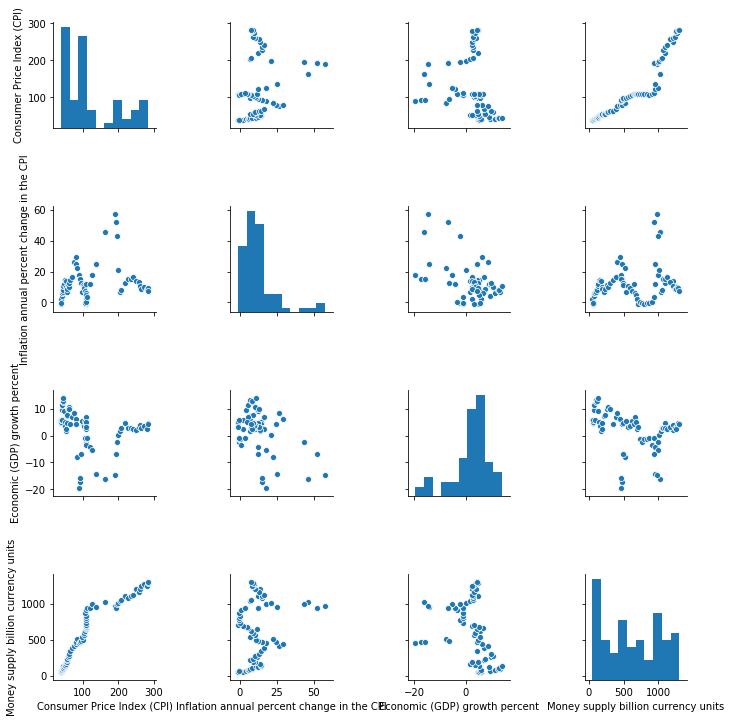

In [12]:
sns.pairplot(df[[
    'Consumer Price Index (CPI)',
    'Inflation annual percent change in the CPI',
    'Economic (GDP) growth percent',
    'Money supply billion currency units'
]].dropna())

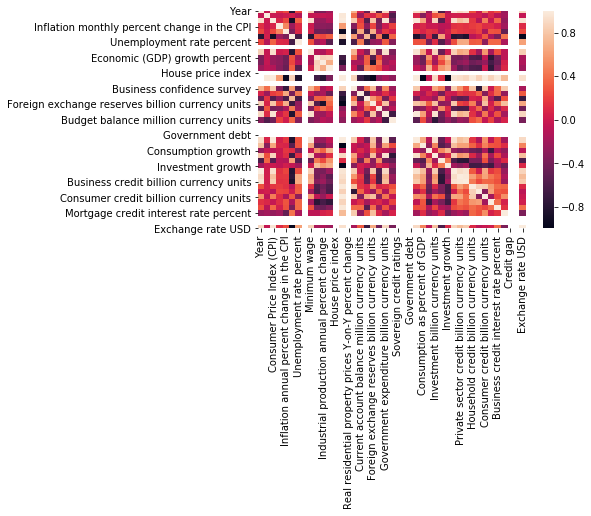

In [33]:
corr = df.corr()
plot = sns.heatmap(corr)
chdir('/home/olga/Projects/CPI/Regression')
plot.get_figure().savefig('figure.jpg', dpi=700)